<a href="https://colab.research.google.com/github/satista/Data_Science/blob/main/DSP_AP_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module INM378/IN3031: Digital Signal Processing and Audio Programming
## Lab 1 - Getting Started with Digital Signals

## Solutions

### 0.  Setting up dependencies 
This step is for installing the latest version of the dsp_ap library code from GitHub.

In [ ]:
try:
    import google.colab
    import subprocess
    import os.path
    p = subprocess.run(['git', 'rev-parse', '--is-inside-work-tree'], stdout=subprocess.PIPE, universal_newlines=True)
    if p.stdout == 'true\n':
        !git pull
    else:
        if not os.path.isdir('city_dsp_ap'):
            !git clone --depth 1 -q https://github.com/tweyde/city_dsp_ap.git
        %cd city_dsp_ap
except:
    %cd city_dsp_ap

After installation we can import the `dsp_ap.signals` package and `numpy`.

In [2]:
from dsp_ap.signals import *
import numpy as np

### 1. Making a sound

The code snippet generates a sinusoid (a sine-like wave). 
We first define the paramters frequency, amplitude, and sample rate, and then create an array of time points for the samples. 
Then we generate the samples (`samples1`) and then create an `AudioSignal` object (this is a class from the `dsp_ap package`). `AudioSingal` generates playable audio, that you then can listen to. 

If it works, change the frequency and amplitude values, regenerate the signal by executing the cell again, and listen to it again. 

Why is the `AudioSignal` sample rate information needed for the playback? What is the underlying assuption for not storing the `timepoints`?

In [ ]:
freq1 = 11000 # freq in Hz
amp1 = 0.5 # amplitude factor 
samplerate = 44100 # % sample rate in Hz
duration = 0.8 # sound duration in seconds
timepoints = np.arange(samplerate * duration) / samplerate # create a vector with time values
samples1 = amp1 * np.sin(2 * np.pi * freq1 * timepoints) # vector with samples 
signal1 = AudioSignal(samples1, samplerate) # create an object
signal1.play() # create audio playback
signal1.display(x_range=(0, 0.05)) # show a plot of (a part of) the signal 

**Answer:** the sample rate is needed for playback, because without it we wouldn't know when to progress to the next sample. 

Now, create another sinusoid with twice the frequency (using a new variable `samples2` and `signal2`). 
You only need a new frequency value, you can reuse the `amp1`, `samplerate` and `timepoints` variables. 
Then listen to the new sound and compare it to the previous.

In [ ]:
# write your code here

Now, produce a mixed signal by adding the two sinusoids. 
For this, you can just use `+` on the sample arrays, like you would for individual numbers. This  adds each element of the two arrays (because we are using ). 

What is necessary for this to work? W

Again, listen to the result. They should blend very well, and sound similar to the first signal (`samples1`).

In [ ]:
# write your code here

Finally, change the amplitude of the additional sinusoid (using a new variable `amp2`) and listen to the result.  

Now listen to the new mix and compare to the version above. You can notice a - relatively subtle - change in the timbre (tone 'quality' or 'colour').

In [ ]:
# write your code here

### 2. Frequency analysis in Audacity

**Audacity** is an open audio editing software, that is recommed for many tasks. It is installed on our lab machines, if you are using one remotely, or you can install it on your own machine from the [Audacity homepage](https://www.audacityteam.org). 
(In order to open the commonly used 'mp3' files you also need to [install FFmpeg](https://manual.audacityteam.org/man/faq_installation_and_plug_ins.html#ffdown) and for saving you need to [install Lame](https://manual.audacityteam.org/man/faq_installation_and_plug_ins.html#lame), but that is not needed now.)

Once you have installed Audacity, download the following two  files: [20-16000HzLin5sec.wav](https://github.com/tweyde/city_dsp_ap/raw/master/audio/20-16000HzLin5sec.wav) and [20-16000HzExp5sec.wav
](https://github.com/tweyde/city_dsp_ap/raw/master/audio/20-16000HzExp5sec.wav) and load them into Audacity. 
These are so-called sweeps with a sine wave that increases in frequency over time. 
You will see initially the 'waveform' view. 

1. Switch the view to `Spectrogram` view (see Image 1 below) and compare `Linear` and `Logarithmic` scaling on the frequency axis (see Image 2 below).
2. Analyse the frequencies in the signal (Menu: `Analyze` -> `Plot Spectrum...`). Flip the axis between `Linear frequency` and `Log frequency`.
3. Describe what you see and hear, and think about what it means. We haven't covered the theory behind this, yet. Still try to interpret based on your intution. 


**Image 1** Switching the view in Audacity: click the little triangle highlighted in the image below.

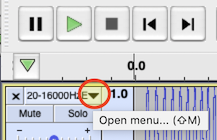

**Image 2** Setting the scale for a Spectogram in Audacity: right-click the scale and select 'Zoom to Fit'. Then switch between Linear and Logarithmic. 

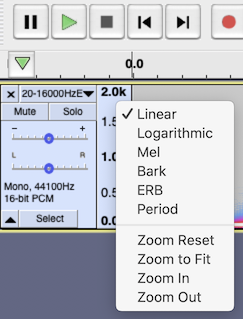


**Answer**

1. The spectrogram shows the intensity of the different fequency components (vertical axis) over time (horizontal axis). 
We can see that in both files there is a tone with frequency increasing over time. 
The difference between the two files is how the fequency increases. 
In the file `20-16000HzLin5sec.wav` there is a constant increase, i.e. straight line in spectrogram with linear scale. 
In the file  `20-16000HzExp5sec.wav` there is a growing increase. It is actually exponential, as indicated by the 'Exp' in the filename. 
When you switch the spectrogram scale to 'Logarithmic', you can see a straight line, because the logarithm is the inverse of the exponential function.  

2. The spectrum shows the intensity of the signal (vertical axis) per frequency (horizontal axis). For both files, we can see that a wide range of frequencies is present in the signal (between 20Hz and 16000Hz to be exact, as indicated in the file name). In that sense, these spectra strongly resemble the spectrum of noise. However, at any point in time, only one frequency is present. 
The explanation is that a spectrum displays the frequencies present in a signal as a whole. 
All information about the timing of when those frequencies exactly occur is lost. 
Downward sweeps going from 16 kHz to 20 Hz would therefore have the same spectra.
The difference between the two files concerns the time that is spent on each frequency. The frequency in the first sweep increases linearly, meaning that the same amount of time is spent on each frequency between ~20 Hz and 16 kHz.  We can see this in the spectrum by noticing that its shape stays flat between the two endpoints, regardless of the frequency axis being linear or logarithmic. This is similar to white noise (more on that in a later session).
The frequency in the second sweep increases exponentially. 
This means that more time is spent on the lower frequencies than on the higher ones. 
The spectrum therefore looks like an exponentially decreasing slope when representing it with a linear frequency axis and as a straight downwards line when plotting with a logarithmic frequency axis.

### 3. Summing sine waves

Adding two sine waves in perfect synchronisation (same starting points) doubles the amplitude compared to one.

1. The power of a signal is quadratic to the amplitude, what does this mean for the power of two added sinusoids?
2. Express the amplitude and power increase in dB.

#### Answer

1. The power is multiplied by four compared to a single sinusoid.
2. The amplitude increases by $10 \log_{10} 2 \approx 3~\mathrm{dB}$ and the power by $10 \log_{10} 4 = 10 \log_{10} 2^2 = 20 \log_{10} 2 \approx 6 \mathrm{dB}$.

### 4. Influence of the sampling frequency 

Try changing the sine frequency and sampling frequency (`samplerate`) in the first snippet (replicated below for convenience).

1. Reduce the sampling frequency to 8000 Hz and listen to the output. Is there any audible difference in the output?
2. With 8000 Hz sampling frequency, increase the sine tone frequency (`freq1`) in steps of 1000 Hz until 5500 Hz and listen to the output at each step. Use also 4000 Hz. Try to interpret what you hear.

In [ ]:
freq1 = 500 # freq in Hz
amp1 = 0.5 # amplitude factor 
samplerate = 44100 # % sample rate in Hz
duration = 0.8 # sound duration in seconds
timepoints = np.arange(samplerate * duration) / samplerate # time points vector
samples1 = amp1 * np.sin(2 * np.pi * freq1 * timepoints) # samples vector
signal1 = AudioSignal(samples1, samplerate) # signal object
signal1.play()
signal1.display(x_range=(0, 0.05))

1. No, there is no audible difference.
2. Changing the sine frequency up to 4000 Hz creates the perception of a rising tone, but after 4000 Hz, the tones seems to go down again. A tone with frequency $f$ higher than 4000 Hz sounds the same as a tone of frequency $8000-f$, and a tone of exactly 4000 Hz doesn't sound like a sine wave at all.